In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
import re

## Heatmaps composites 60C, 5.4-30RH temp swing

In [7]:
import os

number_of_steps = 50
values = {}
values['min_time'] = 1
values['step'] = 1
t_ads_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)
t_des_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)




path = 'kinetics_fitting/composites_60C/'
#for i in filelist:
#    print(i)
filelist = ['Heatmap_ROS-037_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_ROS-039_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            ]

heatmap_list = []

for filename in filelist:
    print(filename)
    working_capacity_per_time_array = np.loadtxt( path + filename,  delimiter=',')
    heatmap_list.append(working_capacity_per_time_array)

Heatmap_ROS-037_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_ROS-039_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv


2
5 min 5 min: 0.3687150734791719
5 min 5 min: 5.309497058100075
7 min 4 min: 0.45769338973196727
7 min 4 min: 6.5907848121403285
5 min 5 min: 0.5089597731625537
5 min 5 min: 7.329020733540774
7 min 4 min: 0.4300183072687565
7 min 4 min: 6.192263624670094


C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


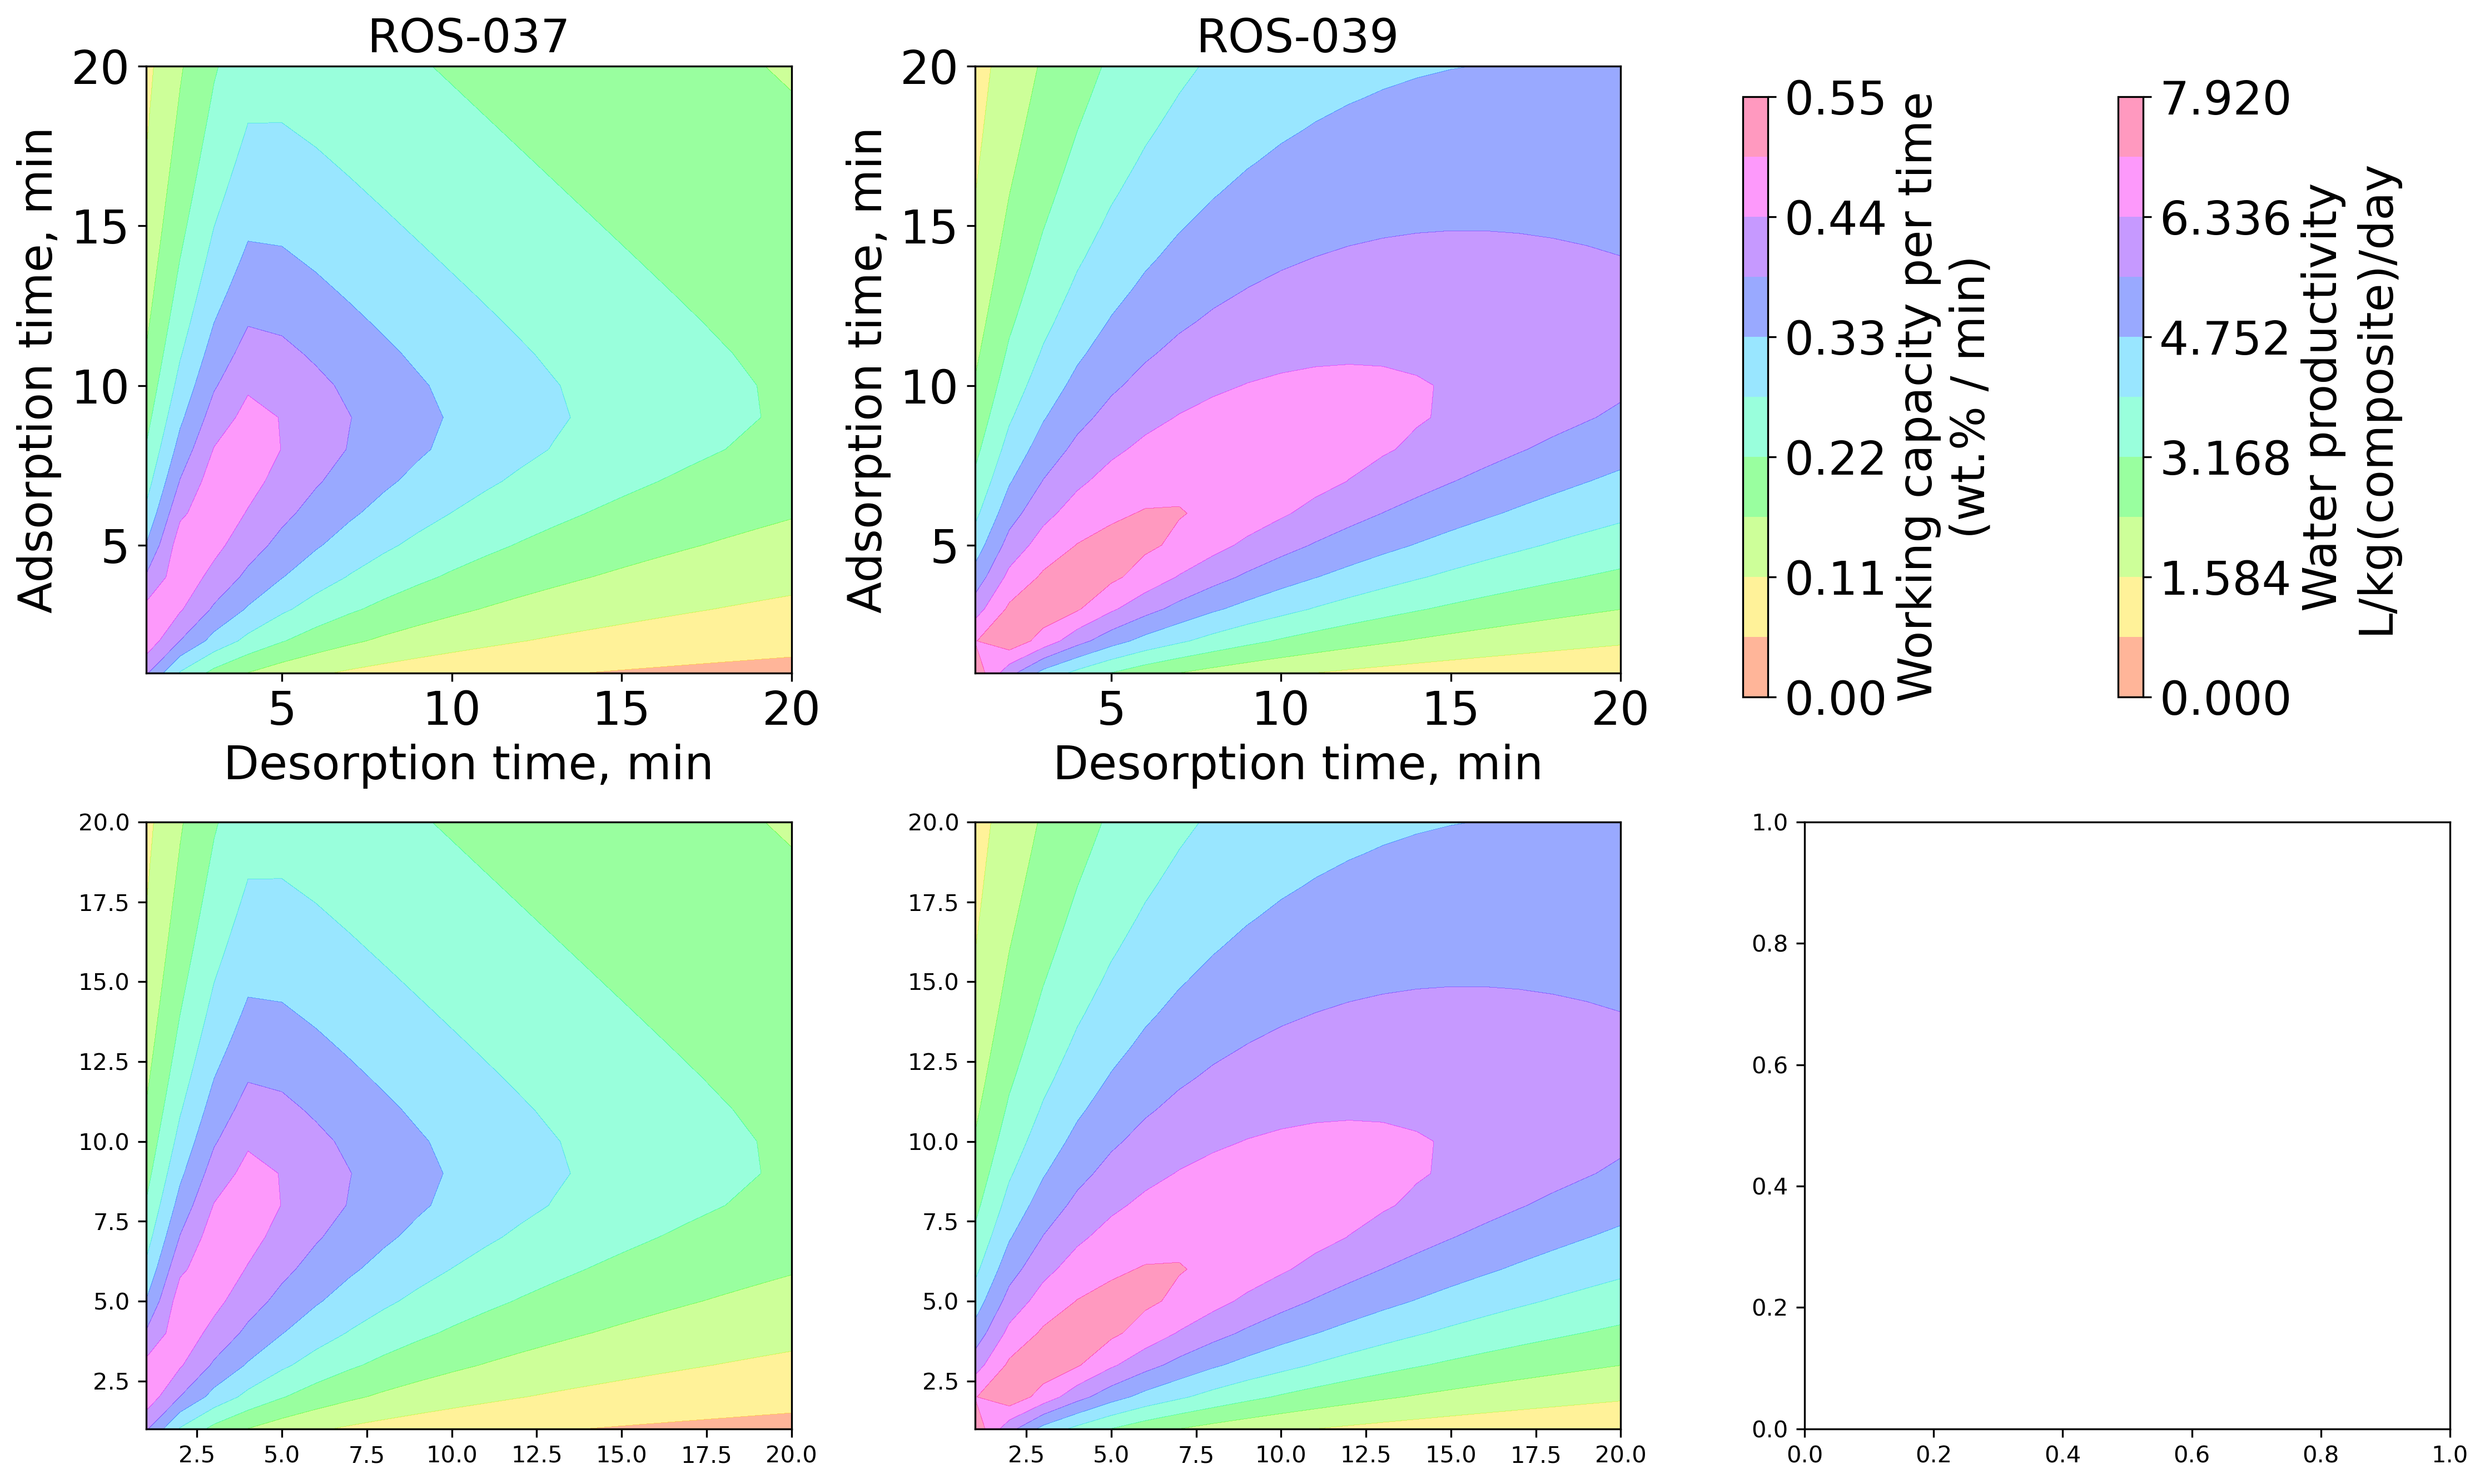

In [8]:
f, axarr = plt.subplots(2, 3, figsize = (3*5, 2*(4.5)), dpi=300)
wt_to_L = 60*24/100
max_wc = 0.55
max_diff = 1
idx = 20
text_size = 20
print(len(heatmap_list))
for i, vert_hm in enumerate(heatmap_list[:]):
    print('5 min 5 min:', vert_hm[4, 4])
    print('5 min 5 min:', vert_hm[4, 4]*wt_to_L)
    print('7 min 4 min:', vert_hm[6, 3])
    print('7 min 4 min:', vert_hm[6, 3]*wt_to_L)
    cp1 = axarr[0, i].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[0, i].tick_params(axis='x', labelsize=text_size)
    axarr[0, i].tick_params(axis='y', labelsize=text_size)
    axarr[0, i].set_xlabel('Desorption time, min', fontsize=text_size)
    axarr[0, i].set_ylabel('Adsorption time, min', fontsize=text_size)
    axarr[0, i].set_title(filelist[i].split('_')[1], fontsize=text_size)
    axarr[0, i].set_ylim([1, idx])
    axarr[0, i].set_xlim([1, idx])
    cp2 = axarr[1, i].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx]*wt_to_L ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc*wt_to_L for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc*wt_to_L, cmap='hsv', alpha=0.4
                           )
axarr[0, 2].axis('off')
cax = plt.axes([0.70, 0.53, 0.01, 0.40])
cbar = plt.colorbar(cp1, cax=cax)
cbar.ax.tick_params(labelsize=text_size)
cbar.set_label('Working capacity per time\n(wt.% / min)', rotation=90, fontsize=text_size)

cax = plt.axes([0.85, 0.53, 0.01, 0.40])
cbar = plt.colorbar(cp2, cax=cax)
cbar.ax.tick_params(labelsize=text_size)
cbar.set_label('Water productivity\nL/kg(composite)/day', rotation=90, fontsize=text_size)

plt.tight_layout()
plt.savefig('Figure6d_Heatmaps_composite_5.4-30RH_tempswing.png', dpi=600)
plt.show()